# Logistic Regression modeling

##### Import libraries and data

In [18]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score

# import data
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")

# get categorical columns
cat_cols = []
for col in train.columns:
    if (train[col].nunique() < 10) & (col != "target"):
        cat_cols.append(col)
        
# get dummies
dummies = pd.DataFrame([])
for col in cat_cols:
    dummy_col = pd.get_dummies(train[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy_col], axis=1)

# replace columns with dummies
train_dummies = train.copy()
train_dummies.drop(cat_cols, axis=1, inplace=True)
train_set = pd.concat([train_dummies, dummies], axis=1)

# remove unecessary features
train_set.drop(["fbs_1", "cp_3", "restecg_2", "ca_4"], axis=1, inplace=True)
 
# get dummies
dummies = pd.DataFrame([])
for col in cat_cols:
    dummy_col = pd.get_dummies(val[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy_col], axis=1)

# replace columns with dummies
val_dummies = val.copy()
val_dummies.drop(cat_cols, axis=1, inplace=True)
val_set = pd.concat([val_dummies, dummies], axis=1)


train_set.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,restecg_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,68,120,211,115,1.5,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,60,140,185,155,3.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,51,110,175,123,0.6,1,1,0,1,1,0,0,1,0,0,0,0,1,0
3,57,124,261,141,0.3,0,1,1,0,1,0,0,1,0,0,0,0,0,1
4,56,120,236,178,0.8,1,1,1,0,1,0,0,1,0,0,0,0,1,0


# 1. Split X and y

In [2]:
X = train.drop("target", axis=1)
y = train.target

X_val = val.drop("target", axis=1)
y_val = val.target

# 2. Scaling

In [3]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_val = sc.transform(X_val)

cols = train.drop("target", axis=1).columns
X = pd.DataFrame(X, columns=cols)
X_val = pd.DataFrame(X_val, columns=cols)

# 3. Hyperparameter tuning

In [4]:
params = {
    "C":[0.1, 0.05, 1, 5, 10]
}

gs = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
gs.fit(X, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 0.05, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [5]:
gs.best_params_

{'C': 0.1}

In [6]:
model1 = gs.best_estimator_

# Performance Metrics

In [7]:
model1.fit(X, y)
train_pred = model1.predict(X)
y_pred = model1.predict(X_val)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       114
           1       0.83      0.92      0.87       130

    accuracy                           0.86       244
   macro avg       0.86      0.85      0.85       244
weighted avg       0.86      0.86      0.86       244


 validation scores
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.86      0.90      0.88        20

    accuracy                           0.82        28
   macro avg       0.79      0.76      0.77        28
weighted avg       0.82      0.82      0.82        28



C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Feature importances

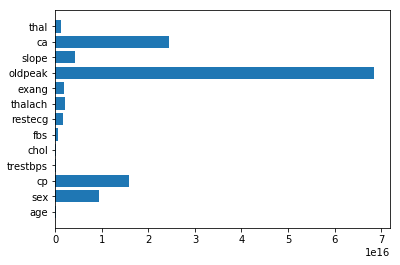

In [8]:
# find most important features
means = [X[col].mean() for col in X.columns]
coef = model1.coef_
importances = abs(coef/means)[0]

plt.barh(X.columns, importances)
plt.show()

## Remodel with only most important features

In [9]:
X_t = pd.concat([X.oldpeak, X.ca, X.cp, X.sex], axis=1)
X_val_t = pd.concat([X_val.oldpeak, X_val.ca, X_val.cp, X_val.sex], axis=1)

## Hyper parameter tuning

In [13]:
params = {
    "C":[0.1, 0.05, 1, 5, 10]
}

gs = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
gs.fit(X_t, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 0.05, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
gs.best_params_

{'C': 0.1}

In [15]:
model2 = gs.best_estimator_

# Performance Metrics

In [16]:
model2.fit(X_t, y)
train_pred = model2.predict(X_t)
y_pred = model2.predict(X_val_t)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       114
           1       0.81      0.87      0.84       130

    accuracy                           0.82       244
   macro avg       0.83      0.82      0.82       244
weighted avg       0.82      0.82      0.82       244


 validation scores
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.94      0.85      0.89        20

    accuracy                           0.86        28
   macro avg       0.82      0.86      0.84        28
weighted avg       0.87      0.86      0.86        28



C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Precision Recall Tradeoff

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


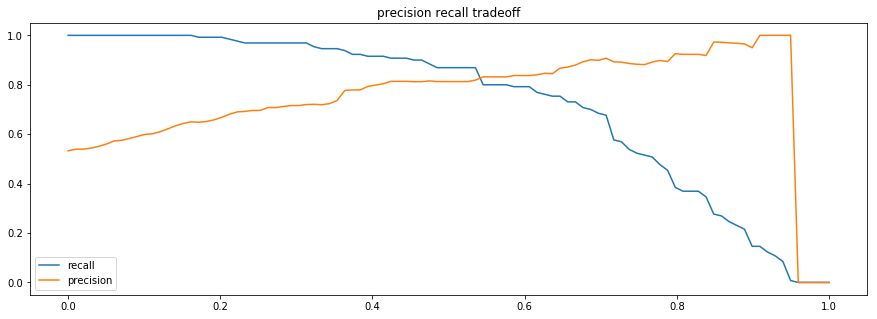

In [19]:
probs = model2.predict_proba(X_t)[:, 1]

thresholds = np.linspace(0, 1, 100)

precisions = []
recalls = []
for thresh in thresholds:
    predicted_vals = [1 if prob > thresh else 0 for prob in probs]
    precisions.append(precision_score(y, predicted_vals))
    recalls.append(recall_score(y, predicted_vals))

plt.figure(figsize=(15, 5))
plt.plot(thresholds, recalls, label="recall")
plt.plot(thresholds, precisions, label="precision")
plt.title("precision recall tradeoff")
plt.legend()
plt.show()